In [13]:
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


In [14]:
X_centered = X - X.mean(axis=0)
U,s,Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

In [15]:
W2 =Vt.T[:,:2]
X2D = X_centered.dot(W2)

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)


In [17]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

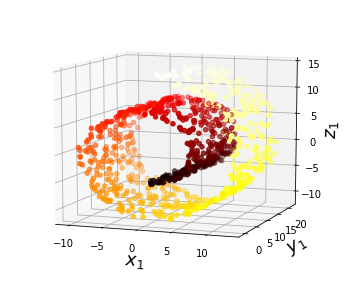

In [28]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


axes = [-11.5,14,-2,23,-12,15]
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X[:,0],X[:,1],X[:,2],c=t,cmap=plt.cm.hot)
ax.view_init(10,-70)
ax.set_xlabel("$x_1$",fontsize=18)
ax.set_ylabel("$y_1$",fontsize=18)
ax.set_zlabel("$z_1$",fontsize=18)

ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

In [ ]:
plt.figure(figsize=(11,4))

plt.figure(121)
plt.scatter(X[:,0],X[:,1],c=t,cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$x_2$",fontsize=18,rotation=0)
plt.grid(True)

plt.figure(122)
plt.scatter(t,X[:,1],c=t,cmap=plt.cm.hot)
plt.axis([4,15,axes[2],axes[3]])
plt.xlabel("$z_1$",fontsize=18)
plt.grid(True)
plt.show()

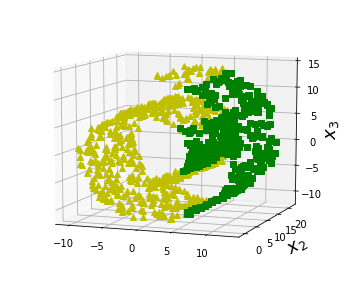

In [22]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
#ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
#ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

In [ ]:
pca = PCA(n_components=0.95)
X_reduce = pca.fit_transform(X_train)
pca.n_components_

In [ ]:
np.sum(pca.explained_variance_ratio_)



In [ ]:
X_recovered = pca.inverse_transform(X_reduce)